# CAT (COMUNICAÇÃO DE ACIDENTE DE TRABALHO) - 1º Semestre 2021

<img src='cat.jpg'/>

# Introdução

Um importante meio para análise sobre acidentes e doenças ocupacionais e do trabalho é a CAT (COMUNICAÇÃO DE ACIDENTE DE TRABALHO, além de sua emissão  ser direito do  trabalhador e  ser fundamental para o recebimento de benefícios em caso de necessidade afastamento de serviço é importante também, para sugerir mudanças  e reivindicar políticas públicas  nas formas de organização do trabalho, nos instrumentos, ferramentas e equipamentos dos trabalhadores.

Para compreender essa problemática vamos realizar uma análise exploratória desses dados, discutir acerca desse tema e levantar algumas hipóteses.

A base de dados utilizada para esse estudo está disponível no site dados.gov.br, disponível em: https://dados.gov.br/dataset/inss-comunicacao-de-acidente-de-trabalho-cat . 




# Analisando os dados

 É importante realizar a estruturação e limpeza dos dados

In [46]:
# Importando as bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [47]:
#Carregando o dataframe
df = pd.read_csv('D.SDA.PDA.005.CAT.202104.csv', sep=';')

In [48]:
df.head()

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,{ñ class},2021/02,{ñ class},F43.1 Estado de Stress Pos-Traum,8610,Atividades de Atendimento Hospitalar,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2021/02,0000/00,08/02/2021,06/02/1985,12/04/2021,47.617.584.000.374
1,"Caixa, Engradado, Caixote - Embalagem, Recipi",2021/02,415210-Oper. Triagem e Transbordo,S43.0 Luxacao da Articulacao do Ombro,5310,Atividades de Correio,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Roraima,Paraná,2021/02,0000/00,26/02/2021,06/02/1973,27/04/2021,34.028.316.673.361
2,"Metal - Inclui Liga Ferrosa e nao Ferrosa, Tu",2021/03,725505-Montador de Veículos (Linha de Mont.),S61.0 Ferim de Dedos s/Lesao da Unha,2930,"Fabricacao de Cabines, Carrocerias e Reboques",Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Rio Grande do Sul,2021/03,0000/00,30/03/2021,24/03/1962,01/04/2021,00.940.956.000.173
3,Maquina Textil,2021/03,761005-Oper. Polivalente da Indústria Têxtil,{ñ class},3250,Fabricacao de Instrumentos e Materiais para U,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Rondônia,Minas Gerais,2021/03,0000/00,27/03/2021,22/12/2000,01/04/2021,10.403.238.000.111
4,"Alavanca, Pe-De-Cabra- Ferramenta Manual Sem",2021/03,"722310-Macheiro, Máquina",S40.0 Contusao do Ombro e do Braco,2814,Fabricacao de Compressores,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Santa Catarina,2021/03,0000/00,30/03/2021,18/08/1962,01/04/2021,84.693.183.000.168


In [49]:
#Número de linhas e colunas
df.shape 

(118043, 24)

In [50]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118043 entries, 0 to 118042
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Agente  Causador  Acidente   118043 non-null  object
 1   Data Acidente                118043 non-null  object
 2   CBO                          118043 non-null  object
 3   CID-10                       118043 non-null  object
 4   CNAE2.0 Empregador           118043 non-null  int64 
 5   CNAE2.0 Empregador.1         118043 non-null  object
 6   Emitente CAT                 118043 non-null  object
 7   Espécie do benefício         118043 non-null  object
 8   Filiação Segurado            118043 non-null  object
 9   Indica Óbito Acidente        118043 non-null  object
 10  Munic Empr                   118043 non-null  object
 11  Natureza da Lesão            118043 non-null  object
 12  Origem de Cadastramento CAT  118043 non-null  object
 13  Parte Corpo At

É excluído os dados que aparecem informações irrelevantes para nossa análise.

In [51]:
def remove(a,b):
     x = df.loc[df[a] == b]
     return df.drop(x.index ,inplace=True)

In [52]:
remove('Data Nascimento','00/00/0000')
remove('Data Acidente.2','00/00/0000')
remove('Sexo','Não Informado')
remove('UF  Munic.  Acidente','{ñ class}       ')
remove('Filiação Segurado','{ñ class}                                    ')
remove('Indica Óbito Acidente','{ñ class}                                    ')
remove('Agente  Causador  Acidente','{ñ class}                                    ')
remove('CBO','{ñ class}                                    ')
remove('CID-10','{ñ class}                                    ')


## Extraindo insights

## Qual número de beneficiários por Estado?

In [53]:
df['UF  Munic.  Acidente'].value_counts()

Maranhão            32941
Rondônia            10458
Roraima              8025
Tocantins            5590
Pará                 1899
Acre                 1673
Ceará                1169
Pernambuco            586
Amazonas              491
Amapá                 318
Sergipe               310
Piauí                 293
Alagoas               152
Paraíba               111
Rio Grande Norte      102
Name: UF  Munic.  Acidente, dtype: int64

Nossa base de dados contempla apenas beneficiários da região Norte e Nordeste

In [54]:
df['Data Acidente'].value_counts()

2021/05    22072
2021/04    20073
2021/06    17477
2021/03     3657
2021/02      535
2021/01      304
Name: Data Acidente, dtype: int64

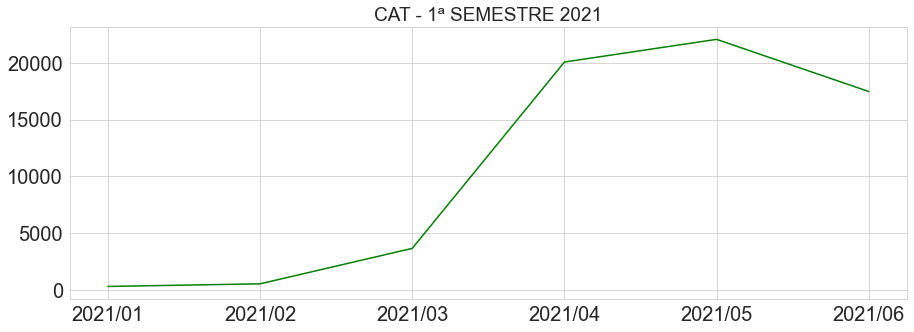

In [55]:
meses = df['Data Acidente'].value_counts().index
quantidade = df['Data Acidente'].value_counts()
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=meses,y=quantidade, color = 'green')
plt.ylabel('', fontsize=15)
plt.title('CAT - 1ª SEMESTRE 2021',fontsize=19);

Apesar do descrescimento observado no gráfico do mês 5 ao 6,de modo geral houve um grande crescimento do número de acidentes de trabalho e doenças emitidos na CAT no semestre.

# Há predominância entre os gêneros?

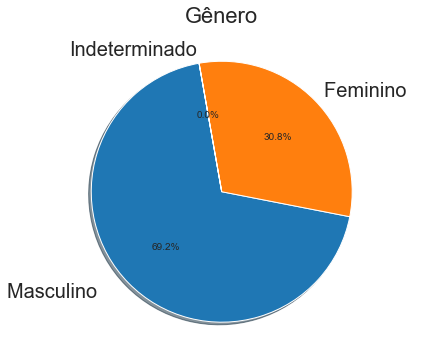

In [56]:
y = df['Sexo'].value_counts() 
x = df[u'Sexo'].value_counts().index
fig = plt.figure(figsize=(6,6))
plt.pie(y, labels=x, autopct='%1.1f%%', shadow = True, startangle=100)
plt.title('Gênero', fontsize=22);

De fato, temos um número maior de homens cadastrados no sistema CAT do que  mulheres.

# Podemos ainda, relacionar as idades com o gênero

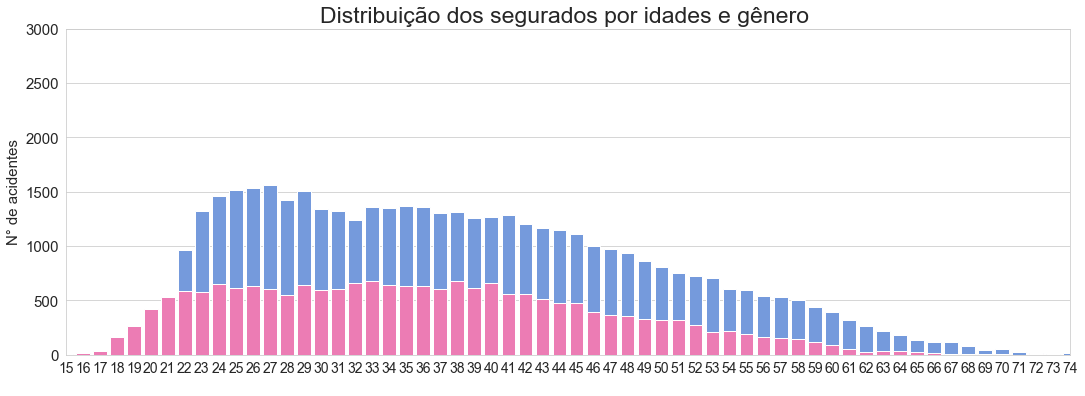

In [57]:
df['Data Nascimento'] = pd.to_datetime(df['Data Nascimento'])
df['Data Acidente.2'] = pd.to_datetime(df['Data Acidente.2'])
df['Idade'] = (df['Data Acidente.2'] - df['Data Nascimento'])
df['Idade']= df['Idade'].astype('<m8[Y]')
fig = plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
df['idade_homem'] = df[df['Sexo'] == 'Masculino    ']['Idade'] #idade das vitimas masculinas
df['idade_homem'] = df['idade_homem'].values.astype(int) #Transformar em int
df['idade_mulher'] = df[df['Sexo'] == 'Feminino     ']['Idade'] #idade das vitimas femininas
df['idade_mulher'] = df['idade_mulher'].values.astype(int)
sns.countplot('idade_homem',color='#6495ED',data=df)
sns.countplot('idade_mulher',color='#FF69B4',data=df)
plt.xlim(1,60)
plt.xlabel(' ')
plt.ylabel('N° de acidentes',fontsize=15)
plt.ylim(0,3000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.title('Distribuição dos segurados por idades e gênero ',fontsize=23);

Podemos observar que há maior predominância do público jovem-adulto e do gênero masculino.


# Qual é idade média?

In [58]:
#df['Data Nascimento'] = pd.to_datetime(df['Data Nascimento'])
#df['Data Acidente.2'] = pd.to_datetime(df['Data Acidente.2'])
#df['Idade'] = (df['Data Acidente.2'] - df['Data Nascimento'])
#df['Idade']= df['Idade'].astype('<m8[Y]')
df['Idade'].mean()

35.65165788078231

<AxesSubplot:xlabel='Idade'>

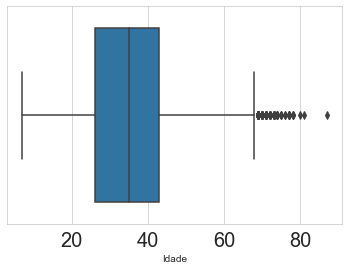

In [59]:
sns.boxplot('Idade', data=df)

Conforme mostra no gráfico,  temos mais concentração de pessoas com idade entre 30 a 40 anos e ainda, apesar de não ser expressivo há um número de pessoas com menos de 18 anos. Podemos investigar essa problemática e consultar quais tipos de acidentes esses adolescentes estão envolvidos.

In [37]:
filtro = df.loc[df['Idade'] < 18] 
categoria = filtro['Tipo do Acidente'].value_counts()
print(categoria)

Típico      107
Trajeto      68
Doença        3
Name: Tipo do Acidente, dtype: int64


# E de modo geral, qual tipo de acidente possui maior frequência?

In [38]:
df['Tipo do Acidente'].value_counts()


Típico      48507
Trajeto     13518
Doença       2093
Name: Tipo do Acidente, dtype: int64

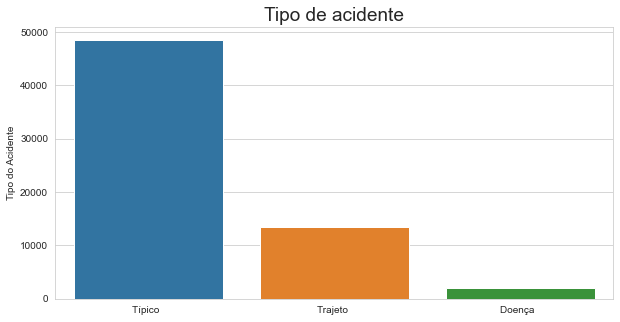

In [39]:
categorias = df['Tipo do Acidente'].value_counts().index
qtd = df[u'Tipo do Acidente'].value_counts() 
fig = plt.figure(figsize=(10,5))
sns.barplot(x= categorias, y = qtd, data=df)
plt.title('Tipo de acidente', fontsize=19);

# Quais são as  causas mais comuns  relacionados a esse tipo de acidente?

<Figure size 1296x432 with 0 Axes>

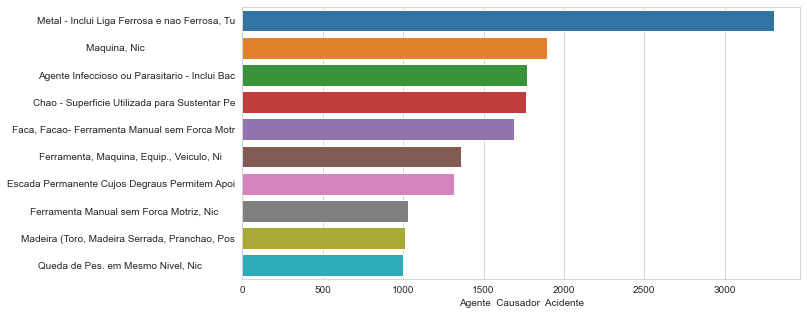

In [40]:
fig = plt.figure(figsize=(18,6))
filtro = df.loc[df['Tipo do Acidente'] == 'Típico  '] 
categoria = filtro['Agente  Causador  Acidente'].value_counts()[:10]
qtd = filtro['Agente  Causador  Acidente'].value_counts().index[:10]
fig = plt.figure(figsize=(10,5))
sns.barplot(x= categoria, y = qtd, data=df)
plt.title('', fontsize= 20);

# Quais profissões são mais envolvida com os acidentes?

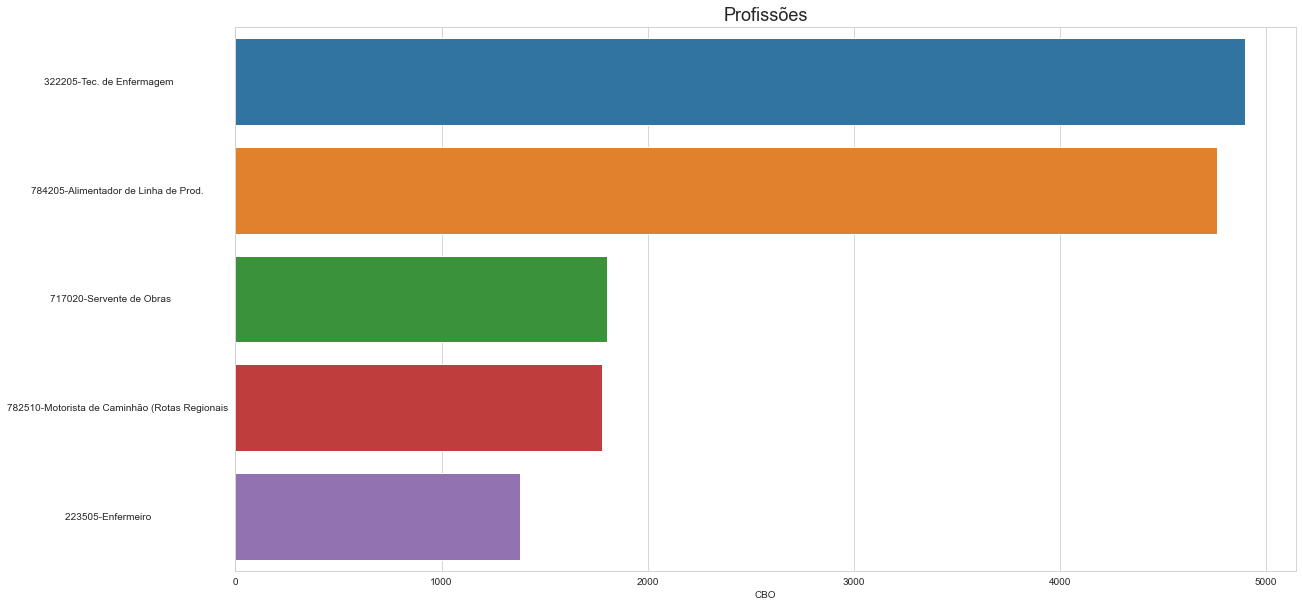

In [41]:
#profissoes = df['CBO'].value_counts()[:10]
#print(profissoes)
categorias_profissoes = df['CBO'].value_counts().index[:5]
qtd = df['CBO'].value_counts()[:5]
fig = plt.figure(figsize=(19,10))
sns.barplot(x= qtd, y =categorias_profissoes , data=df)
plt.title('Profissões', fontsize=18);

# Podemos ir mais fundo e analisar quais as principais lesões dessas profissões

In [42]:
profissoes = df['CBO'].value_counts().index[:5]
filtro = df[df["CBO"].isin(profissoes)] #filtra do df
rancking = filtro['CID-10'].value_counts()[:5]
print(rancking )

Z20.9 Contato Exposicao a Doenc Transmissivel    1213
S61.0 Ferim de Dedos s/Lesao da Unha             1064
S61.1 Ferim de Dedos c/Lesao da Unha              513
B34.2 Infecc p/Coronavirus Ne                     513
S62.6 Frat de Outr Dedos                          498
Name: CID-10, dtype: int64


Podemos perceber que a infecção por Coronavirus ainda é uma agravante dentro das principais lesões

# Qual parte do corpo é mais atingida?

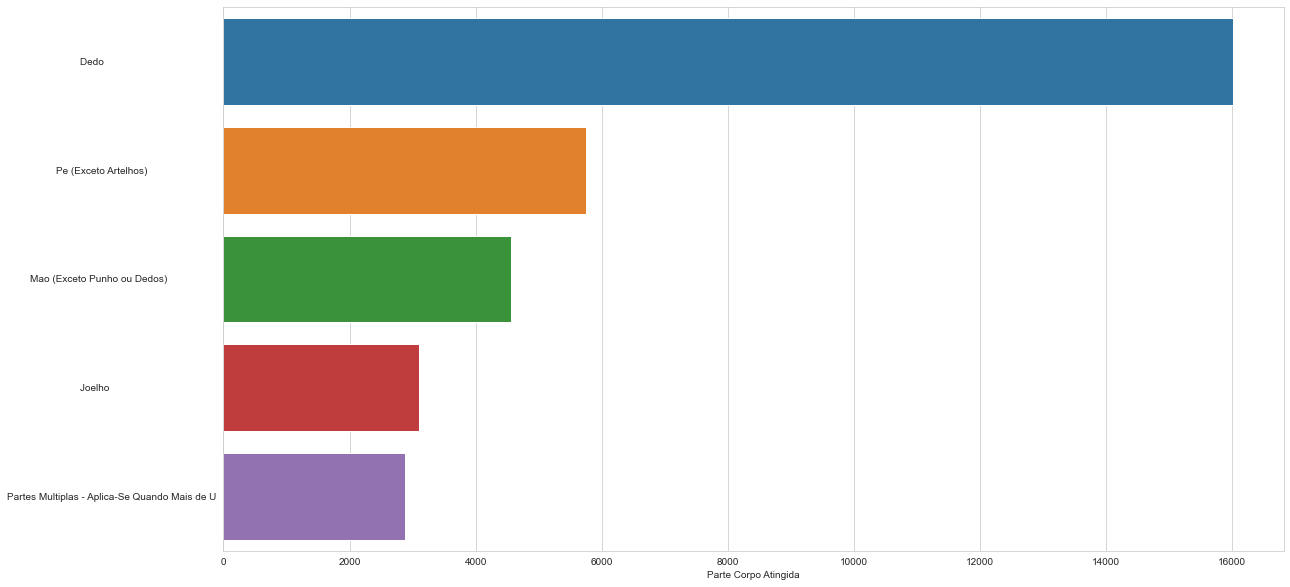

In [43]:
categorias_profissoes = df['Parte Corpo Atingida'].value_counts().index[:5]
qtd = df['Parte Corpo Atingida'].value_counts()[:5]
fig = plt.figure(figsize=(19,10))
sns.barplot(x= qtd, y =categorias_profissoes , data=df)
plt.title('', fontsize=18);

# Qual principal agente causador de acidente de trajeto?

<Figure size 1296x432 with 0 Axes>

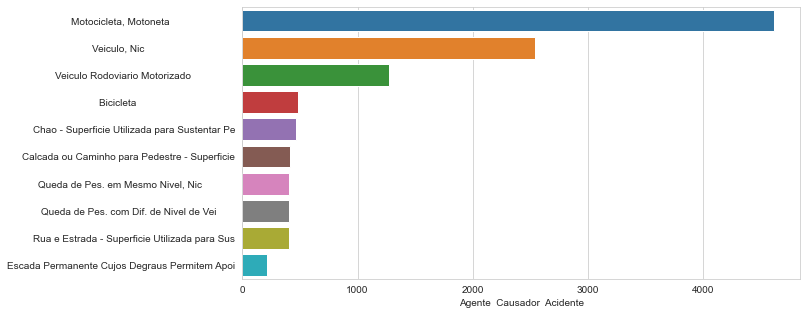

In [44]:
fig = plt.figure(figsize=(18,6))
filtro = df.loc[df['Tipo do Acidente'] == 'Trajeto '] 
categoria = filtro['Agente  Causador  Acidente'].value_counts()[:10]
qtd = filtro['Agente  Causador  Acidente'].value_counts().index[:10]
fig = plt.figure(figsize=(10,5))
sns.barplot(x= categoria, y = qtd, data=df)
plt.title('', fontsize= 20);

# Qual estado predomina mais óbitos?

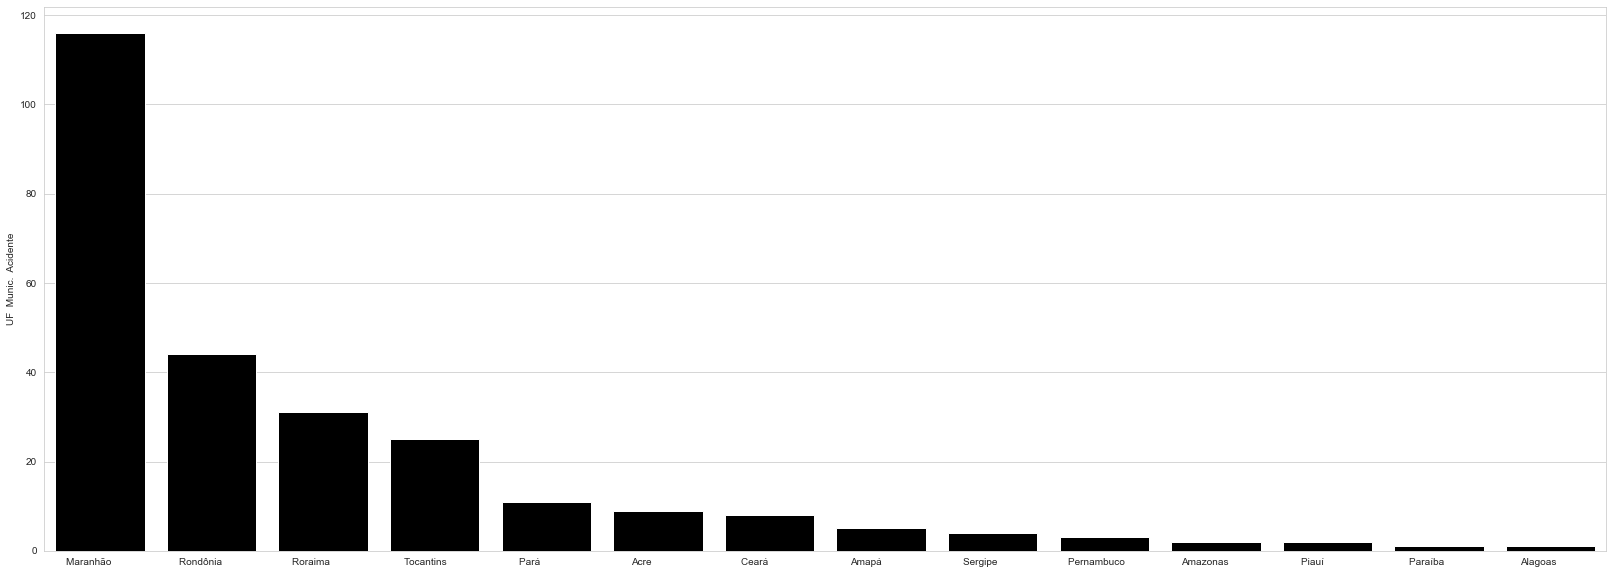

In [45]:
fig = plt.figure(figsize=(28,10))
filtro = df.loc[df['Indica Óbito Acidente'] == 'Sim'] 
categoria = filtro['UF  Munic.  Acidente'].value_counts().index
qtd = filtro['UF  Munic.  Acidente'].value_counts()
sns.barplot(x= categoria, y = qtd, data=df,color='black')
plt.title('', fontsize= 20);
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

O estado de Maranhão possui majoritariamente mais óbitos

# Conclusão

- Aproximadamente 69,2% dos homens estão envolvidos com acidentes de trabalho.
- O público jovem-adulto é o principal.
- A média de idade é 35 anos.
- O acidente típico é o que mais predomina e está associado principalmente á agentes causadores como metal,máquina,agente infeccioso, facão.
- No rancking das profissões mais perigosas envolvidas nesses acidentes, temos a de técnico de enfermagem, alimentador de linha de produção,servente de obra,motorista de caminhao e enfermeiro, e que infelizmente, são atividades que não são bem remuneradas em nossa sociedade.
- A infecção por coronavírus é ainda significativa dentro do rancking de lesões.
- Os dedos é parte mais atingida pelos acidentes e requer maior cuidado.
- Como esperado, a moto é a principal causadora dos acidentes de trajeto.
- De fato, os estados que mais apresentaram acidente de trabalho,são os que mais apresentaram óbito.


Todavia, se com essa parcela minuciosa de dados diponilizados da Cat conseguimos extrair muitas informações,então a emissão do  Cat e sua análise é crucial para que as autoriedades competentes compreendam e cobrem das empresas melhores condições de trabalho, assim como, segurança para os trabalhadores e o auxílio devido aos segurados.